In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

In [2]:
housing = pd.read_csv("zip_housing.csv")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
housing

,property_id,prop_type,year_built,is_new_construction,beds,baths_full,baths_half,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code
0,O2889402305,multi_family,1906.0,False,NaN,NaN,NaN,3.0,570000,7057.0,1756.0,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
1,O1305476579,single_family,1913.0,False,3.0,1.0,1.0,1.0,470000,5721.0,1030.0,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
2,O9299703972,multi_family,1938.0,False,NaN,NaN,NaN,NaN,830000,5495.0,2503.0,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001
3,O2866856410,single_family,1905.0,False,4.0,2.0,NaN,NaN,400000,5387.0,1248.0,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001
4,O2823776981,condo,1912.0,False,5.0,2.0,NaN,NaN,659000,5667.0,1897.0,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123505,O9486418930,single_family,NaN,False,3.0,2.0,NaN,2.0,325319,NaN,1608.0,20181 Ballentine Dr Lot 25,NaN,Anderson,Shasta,CA,96007
123506,O1186909007,single_family,1953.0,False,2.0,1.0,NaN,1.0,212000,13068.0,998.0,3266 E Bailey Dr,['Cascade'],Anderson,Shasta,CA,96007
123507,O1465953236,mobile,1978.0,False,3.0,2.0,NaN,NaN,87000,30928.0,1533.0,19541 Spring Gulch Rd,['Cascade'],Anderson,Shasta,CA,96007
123508,O1435892887,single_family,2006.0,False,3.0,2.0,NaN,NaN,305000,6970.0,1263.0,3500 Nathan Dr,['Cascade'],Anderson,Shasta,CA,96007


In [4]:
housing = housing.fillna(housing.mean()).astype({"year_built": int, "beds": int, "baths_full": int, "baths_half": int, "garage": int,"price": int,
                         "lot_size": int,"building_size": int, "postal_code": str})

In [5]:
housing

,property_id,prop_type,year_built,is_new_construction,beds,baths_full,baths_half,garage,price,lot_size,building_size,line,neighborhoods,city,county,state_code,postal_code
0,O2889402305,multi_family,1906,False,3,2,1,3,570000,7057,1756,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
1,O1305476579,single_family,1913,False,3,1,1,1,470000,5721,1030,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles,CA,90001
2,O9299703972,multi_family,1938,False,3,2,1,2,830000,5495,2503,1222 E 78th St,['South LA'],Los Angeles,Los Angeles,CA,90001
3,O2866856410,single_family,1905,False,4,2,1,2,400000,5387,1248,1659 E 70th St,['South LA'],Los Angeles,Los Angeles,CA,90001
4,O2823776981,condo,1912,False,5,2,1,2,659000,5667,1897,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123505,O9486418930,single_family,1973,False,3,2,1,2,325319,1256668,1608,20181 Ballentine Dr Lot 25,NaN,Anderson,Shasta,CA,96007
123506,O1186909007,single_family,1953,False,2,1,1,1,212000,13068,998,3266 E Bailey Dr,['Cascade'],Anderson,Shasta,CA,96007
123507,O1465953236,mobile,1978,False,3,2,1,2,87000,30928,1533,19541 Spring Gulch Rd,['Cascade'],Anderson,Shasta,CA,96007
123508,O1435892887,single_family,2006,False,3,2,1,2,305000,6970,1263,3500 Nathan Dr,['Cascade'],Anderson,Shasta,CA,96007


In [6]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,year_built,beds,baths_full,baths_half,garage,price,lot_size,building_size
year_built,1.000000,0.036218,0.110675,0.033250,0.026804,-0.008006,0.009465,-0.004993
beds,0.036218,1.000000,0.750722,0.064896,0.026153,0.116899,-0.007146,0.000697
baths_full,0.110675,0.750722,1.000000,0.073130,0.029449,0.122755,-0.002843,0.000748
baths_half,0.033250,0.064896,0.073130,1.000000,0.015649,0.043972,0.001249,0.000293
garage,0.026804,0.026153,0.029449,0.015649,1.000000,0.006751,-0.001185,-0.000607
price,-0.008006,0.116899,0.122755,0.043972,0.006751,1.000000,-0.001633,0.000068
lot_size,0.009465,-0.007146,-0.002843,0.001249,-0.001185,-0.001633,1.000000,-0.000086
building_size,-0.004993,0.000697,0.000748,0.000293,-0.000607,0.000068,-0.000086,1.000000


In [7]:
demographic = pd.read_csv("Modified_data/demographic_refined.csv")
demographic

,zipcode,county_name,city,population,population_rank,city_name,aland,median_household_income,average_household_income,per_capita_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,90242,Los Angeles,Downey,112322,59,Downey,11788002,71233,85792,26335,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,90747,Los Angeles,Carson,92079,83,Carson,16629,72803,91209,28026,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,67817,94589,38247,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,51636,73784,25970,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,33319,45497,16435,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,64267,87211,30575,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,54729,77169,31101,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,35981,51524,16278,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,104578,140825,56291,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_demo = demographic.select_dtypes(include=numerics)

[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'population'),
 Text(2.5, 0, 'population_rank'),
 Text(3.5, 0, 'aland'),
 Text(4.5, 0, 'median_household_income'),
 Text(5.5, 0, 'average_household_income'),
 Text(6.5, 0, 'per_capita_income'),
 Text(7.5, 0, 'percent_of_households_with_incomes_200000_or_more'),
 Text(8.5, 0, 'householder_under_25_years'),
 Text(9.5, 0, 'householder_25_to_44_years'),
 Text(10.5, 0, 'householder_45_to_64_years'),
 Text(11.5, 0, 'householder_65_years_and_over'),
 Text(12.5, 0, 'hhi_total'),
 Text(13.5, 0, 'hhi_lt_25k'),
 Text(14.5, 0, 'hhi_25k_to_49k'),
 Text(15.5, 0, 'hhi_50k_to_749k'),
 Text(16.5, 0, 'hhi_75k_to_999k'),
 Text(17.5, 0, 'hhi_100k_to_1490k'),
 Text(18.5, 0, 'hhi_150k_to_1999k'),
 Text(19.5, 0, 'hhi_200k_or_more'),
 Text(20.5, 0, 'race_and_ethnicity_total'),
 Text(21.5, 0, 'population_density_sq_mi'),
 Text(22.5, 0, 'median_age'),
 Text(23.5, 0, 'educational_attainment_bachelors'),
 Text(24.5, 0, 'educational_attainment_graduate'),
 Text(25.5, 0, 'fam

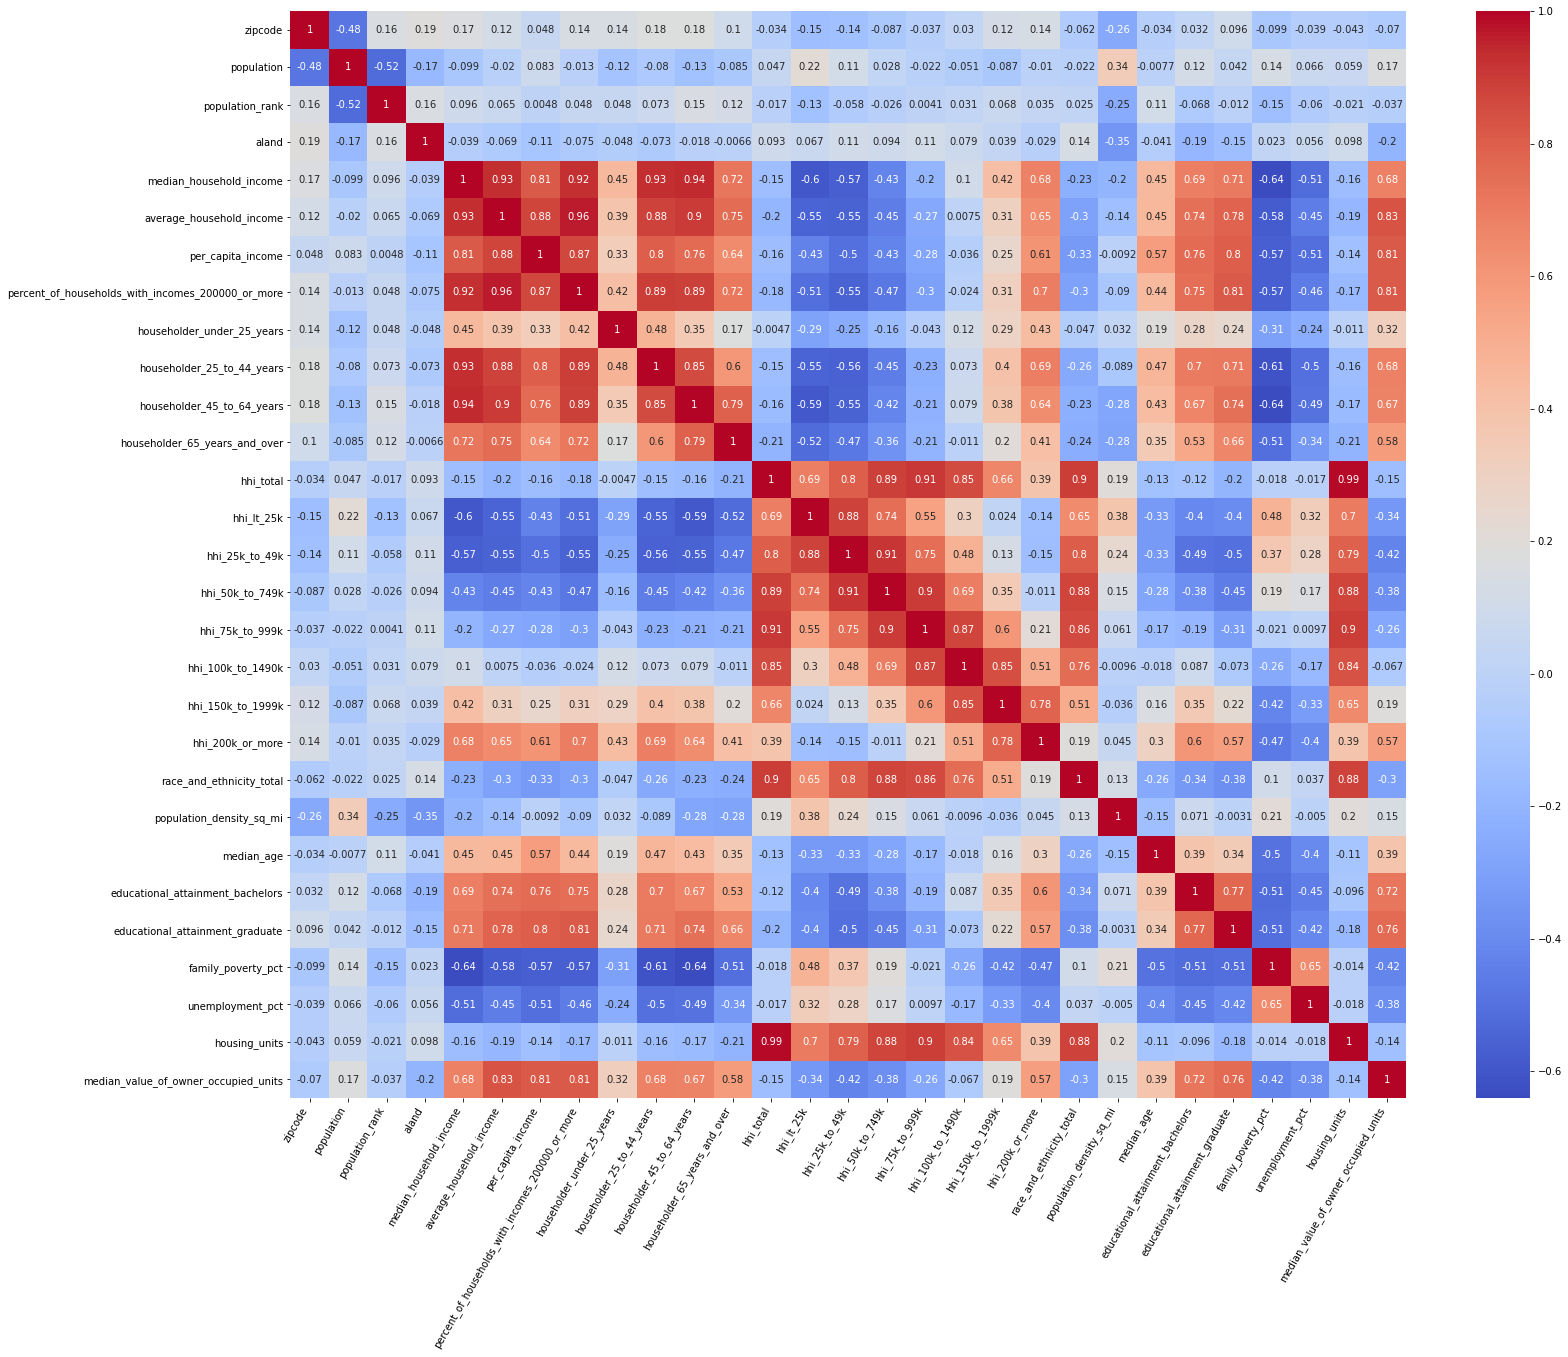

In [9]:
##d_corr = demographic.corr()
##d_corr.style.background_gradient(cmap='coolwarm')
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(demographic.corr(), annot = True, 
            cmap=plt.get_cmap('coolwarm'))
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right')
##plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [10]:
X = pd.DataFrame(scale(new_demo), index=new_demo.index, columns=new_demo.columns)

In [11]:
pca_plot_list = []
for i in range(len(new_demo.columns)):
    temp = "PC" + str(i+1)
    pca_plot_list.append(temp)
pca = PCA()
demographic_plot = pd.DataFrame(pca.fit_transform(X), columns=pca_plot_list, index=X.index)

Text(0.5, 0, 'Principal Component loading vectors')

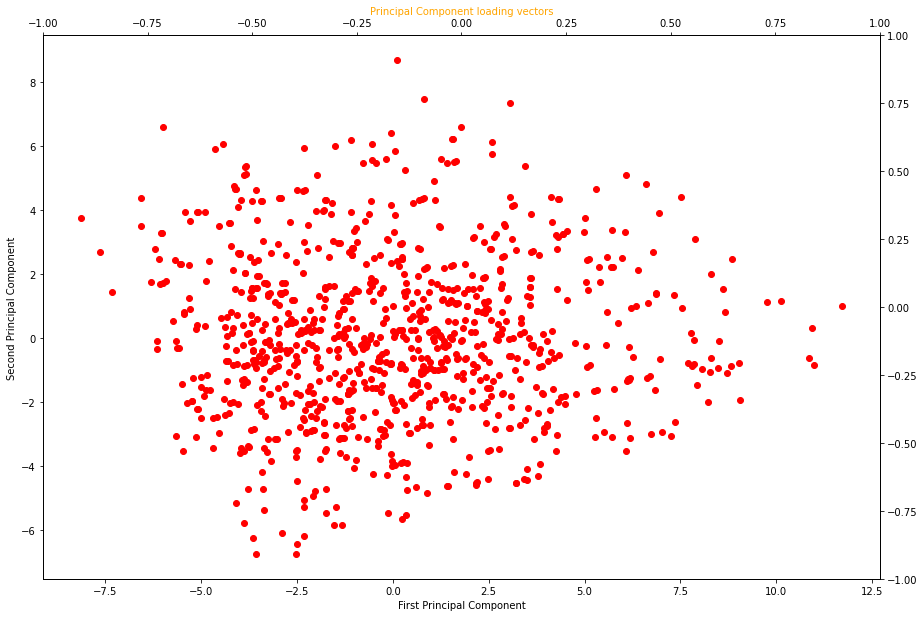

In [12]:
fig , ax1 = plt.subplots(figsize=(15,10))


for i in demographic_plot.index:
    ax1.scatter(demographic_plot.PC1[i], demographic_plot.PC2[i], color = 'red')


ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

(0.0, 1.0)

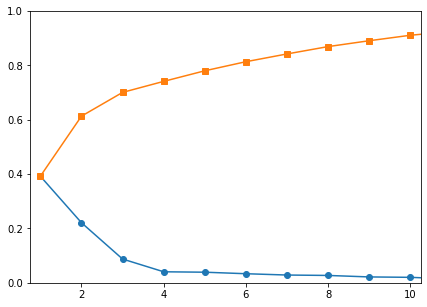

In [13]:
plt.figure(figsize=(7,5))

plt.plot([i+1 for i in range(len(new_demo.columns))], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([i+1 for i in range(len(new_demo.columns))], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')
plt.xlim(0.75,10.25)
plt.ylim(0, 1)

In [31]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=False)
housing_groupby_city

,city,year_built,beds,baths_full,baths_half,garage,price,lot_size,building_size
445,Vina,1970.0,2.0,2.0,1.0,2.0,8500000.0,415344600.0,2300.0
388,Silverado,1937.5,2.5,1.5,1.0,2.0,6185000.0,23730.0,1529.0
246,Montecito,1973.0,4.0,4.0,1.0,2.0,4850000.0,43560.0,1923.0
346,SACRAMENTO,1960.0,3.0,2.0,1.0,2.0,4200000.0,44431.0,0.0
28,Beverly Hills,1962.0,4.0,4.0,1.0,2.0,4177500.0,16953.5,3558.5
...,...,...,...,...,...,...,...,...,...
298,Pearblossom,1973.0,3.0,2.0,1.0,2.0,7000.0,221651.0,3226.0
244,Mojave,1973.0,3.0,2.0,1.0,2.0,6500.0,108900.0,3226.0
342,Roosevelt,1973.0,3.0,2.0,1.0,2.0,6000.0,417976.0,0.0
91,Del Sur,1973.0,3.0,2.0,1.0,2.0,5099.0,7595.0,3226.0


<ipython-input-28-b8483498c0fd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels())
<ipython-input-28-b8483498c0fd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right')


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

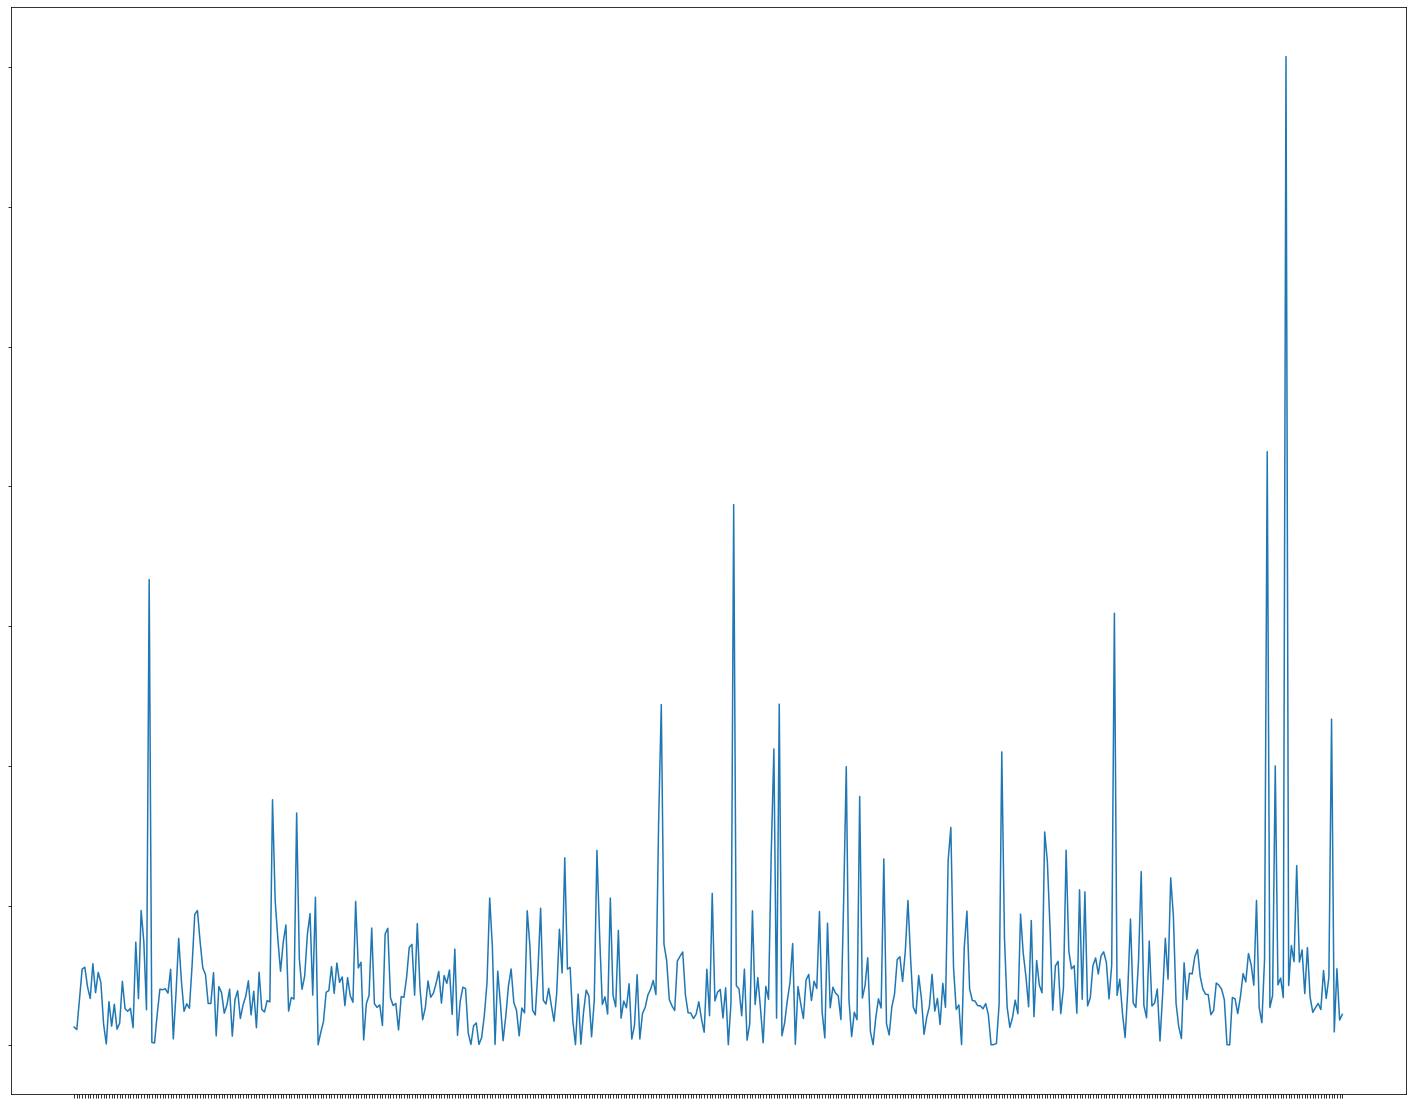

In [28]:
fig, ax = plt.subplots(figsize=(25,20))
plt.plot(housing_groupby_year_built["city"], housing_groupby_year_built["price"])
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels(), rotation="60", horizontalalignment='right')